In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
Crime= pd.read_csv("crime_data.csv")
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm= norm_func(Crime.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


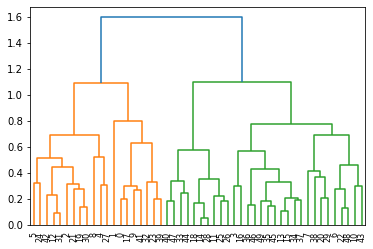

In [6]:
dendrogram= sch.dendrogram(sch.linkage(df_norm , method='complete'))

In [7]:
hc=AgglomerativeClustering(n_clusters=4, affinity ="euclidean",linkage="complete")
y_hc= hc.fit_predict(df_norm)

In [8]:
y_hc

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1])

In [9]:
Crime["h_clusterid"]= y_hc
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


# K-MEANS

In [10]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [11]:
Crime= pd.read_csv("crime_data.csv")
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [12]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

df_norm= norm_func(Crime.iloc[:,1:])

In [13]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


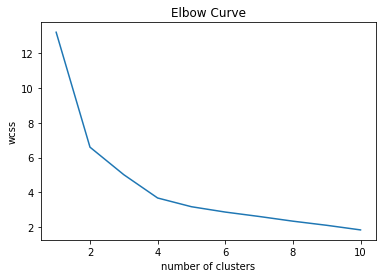

In [14]:
wcss = []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, random_state=2)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Curve")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [15]:
cluster_new = KMeans(4, random_state=42)
cluster_new.fit(df_norm)

KMeans(n_clusters=4, random_state=42)

In [16]:
cluster_new.labels_

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3], dtype=int32)

In [18]:
Crime['clusterid_new'] = cluster_new.labels_
Crime


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


In [19]:
Crime.groupby('clusterid_new').agg(['mean']).reset_index()

/tmp/ipykernel_15987/1314502308.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  Crime.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,10.966667,264.000000,76.500000,33.608333
2,2,13.937500,243.625000,53.750000,21.412500
3,3,5.852941,141.176471,73.647059,19.335294


In [20]:
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


# DB-SCAN

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [22]:
df= pd.read_csv("crime_data.csv")
print(Crime.head())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape  clusterid_new
0     Alabama    13.2      236        58  21.2              2
1      Alaska    10.0      263        48  44.5              1
2     Arizona     8.1      294        80  31.0              1
3    Arkansas     8.8      190        50  19.5              2
4  California     9.0      276        91  40.6              1


In [23]:
print(Crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     50 non-null     object 
 1   Murder         50 non-null     float64
 2   Assault        50 non-null     int64  
 3   UrbanPop       50 non-null     int64  
 4   Rape           50 non-null     float64
 5   clusterid_new  50 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.3+ KB
None


In [24]:
Crime.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


In [25]:
Crime.drop(['Unnamed: 0'],axis=1,inplace=True)
array=Crime.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   2. ],
       [ 10. , 263. ,  48. ,  44.5,   1. ],
       [  8.1, 294. ,  80. ,  31. ,   1. ],
       [  8.8, 190. ,  50. ,  19.5,   2. ],
       [  9. , 276. ,  91. ,  40.6,   1. ],
       [  7.9, 204. ,  78. ,  38.7,   1. ],
       [  3.3, 110. ,  77. ,  11.1,   3. ],
       [  5.9, 238. ,  72. ,  15.8,   3. ],
       [ 15.4, 335. ,  80. ,  31.9,   1. ],
       [ 17.4, 211. ,  60. ,  25.8,   2. ],
       [  5.3,  46. ,  83. ,  20.2,   3. ],
       [  2.6, 120. ,  54. ,  14.2,   0. ],
       [ 10.4, 249. ,  83. ,  24. ,   1. ],
       [  7.2, 113. ,  65. ,  21. ,   3. ],
       [  2.2,  56. ,  57. ,  11.3,   0. ],
       [  6. , 115. ,  66. ,  18. ,   3. ],
       [  9.7, 109. ,  52. ,  16.3,   0. ],
       [ 15.4, 249. ,  66. ,  22.2,   2. ],
       [  2.1,  83. ,  51. ,   7.8,   0. ],
       [ 11.3, 300. ,  67. ,  27.8,   1. ],
       [  4.4, 149. ,  85. ,  16.3,   3. ],
       [ 12.1, 255. ,  74. ,  35.1,   1. ],
       [  2.7,  72. ,  66. ,  14

In [26]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.34956332],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -0.4827303 ],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.4827303 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.34956332],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.4827303 ],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.4827303 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  1.18185693],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  1.18185693],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.4827303 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  0.34956332],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987,  1.18185693],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -1.31502391],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -0.4827303 ],
       [-0.13637203, -0.70012057, -0.0

In [27]:
dbscan= DBSCAN(eps=2, min_samples=7)
dbscan.fit(X)

DBSCAN(eps=2, min_samples=7)

In [28]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [29]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [30]:
pd.concat([Crime,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,clusterid_new,cluster
0,13.2,236,58,21.2,2,0
1,10.0,263,48,44.5,1,-1
2,8.1,294,80,31.0,1,0
3,8.8,190,50,19.5,2,0
4,9.0,276,91,40.6,1,0
5,7.9,204,78,38.7,1,0
6,3.3,110,77,11.1,3,0
7,5.9,238,72,15.8,3,0
8,15.4,335,80,31.9,1,0
9,17.4,211,60,25.8,2,0
